# **Chatgpt Review Sentiment Analysis** 🤖



In [34]:
# import packages
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from textblob import TextBlob

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### **1️⃣ Data Preparation & Cleaning**

- Load and inspect the dataset.
- Address missing values and duplicates.
- Clean the text data (remove special characters, stopwords, etc).
- Explore data by descriptive statistics.




In [3]:
# Load dataset
df = pd.read_csv('ChatGPT_Reviews.csv')

In [4]:
# Inspect the dataset
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Review Id,Review,Ratings,Review Date
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,8/23/2024 19:30
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,8/23/2024 19:28
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,8/23/2024 19:22
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,8/23/2024 19:20
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,8/23/2024 19:20


In [5]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Review Id      0
Review         6
Ratings        0
Review Date    0
dtype: int64


In [6]:
print("\nDuplicate entries:", df.duplicated().sum())


Duplicate entries: 2511


In [7]:
# Drop missing values
df = df.dropna()
print(df.isnull().sum())

Review Id      0
Review         0
Ratings        0
Review Date    0
dtype: int64


In [8]:
# Drop duplicates
df = df.drop_duplicates()
print("\nDuplicate entries:", df.duplicated().sum())


Duplicate entries: 0


In [11]:
# Text cleaning function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\[.*?\]', '', text)  # Remove text inside brackets
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
    return " ".join(words)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"U0001F600-U0001F64F"  # emoticons
                           u"U0001F300-U0001F5FF"  # symbols & pictographs
                           u"U0001F680-U0001F6FF"  # transport & map symbols
                           u"U0001F1E0-U0001F1FF"  # flags (iOS)
                           u"U00002702-U000027B0"
                           u"U000024C2-U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

Inspired by ***Text Cleaning Methods in NLP***: https://www.analyticsvidhya.com/blog/2022/01/text-cleaning-methods-in-nlp/

In [12]:
# Apply text cleaning to the "Review" column
df["Cleaned_Review"] = df["Review"].apply(clean_text).apply(remove_emoji)
df["Cleaned_Review"]

,Cleaned_Review
0,good
1,good
2,nice app
3,nice ig
4,great app bot accurate anything gives tips gam...
...,...
196722,update
196723,grear
196724,funtastic app
196725,hi


In [40]:
print("\nBasic statistics for Ratings:")
df['Ratings'].describe()


Basic statistics for Ratings:


,Ratings
count,194210.000000
mean,4.502678
std,1.084163
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [41]:
# Save cleaned dataset
df.to_csv("Cleaned_ChatGPT_Reviews.csv", index=False)

### 2️⃣ **Exploratory Data Analysis  & Visualization**
* Distributions of features:
    * Ratings
    * Review lengths
* Word Clouds of the Reviews
    * Display a word cloud of the reviews
    * The most frequent words used in reviews for each rating category
* Temporal Trends
    * Ratings over time
    * Number of reviews over time
* Sentiment Analysis
    * Transform ratings into sentiment categories
    * Distribution of Sentiment
    * Sentiment Distribution Over Time
* Summarize EDA findings

In [74]:
# Convert Review Date to datetime format, Ratings to numeric format
df["Review Date"] = pd.to_datetime(df["Review Date"], errors='coerce')
df['Ratings'] = pd.to_numeric(df['Ratings'], errors='coerce')

# Add a column for review length (word count)
df["Review Length"] = df["Cleaned_Review"].apply(lambda x: len(str(x).split()))
df

,Review Id,Review,Ratings,Review Date,Cleaned_Review,Review Length,Sentiment,Sentiment Category,Length Category
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:00,good,1,0.700000,Positive,Short
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:00,good,1,0.700000,Positive,Short
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:00,nice app,2,0.600000,Positive,Short
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:00,nice ig,2,0.600000,Positive,Short
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:00,great app bot accurate anything gives tips gam...,33,0.385714,Positive,Short
...,...,...,...,...,...,...,...,...,...
196722,462686ff-e500-413c-a6b4-2badc2e3b21d,Update 2023,5,2023-07-27 16:26:00,update,1,0.000000,Neutral,Short
196723,f10e0d48-ecb6-42db-b103-46c0046f9be9,its grear,5,2023-09-23 16:25:00,grear,1,0.000000,Neutral,Short
196724,df909a49-90b5-4dac-9b89-c4bd5a7c2f75,Funtastic App,5,2023-11-08 13:57:00,funtastic app,2,0.000000,Neutral,Short
196725,abe43878-973f-4e96-a765-c4af5c7f7b20,hi all,5,2023-07-25 15:32:00,hi,1,0.000000,Neutral,Short


<ipython-input-75-9fda2fcc2ef4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Ratings"], palette="Blues")


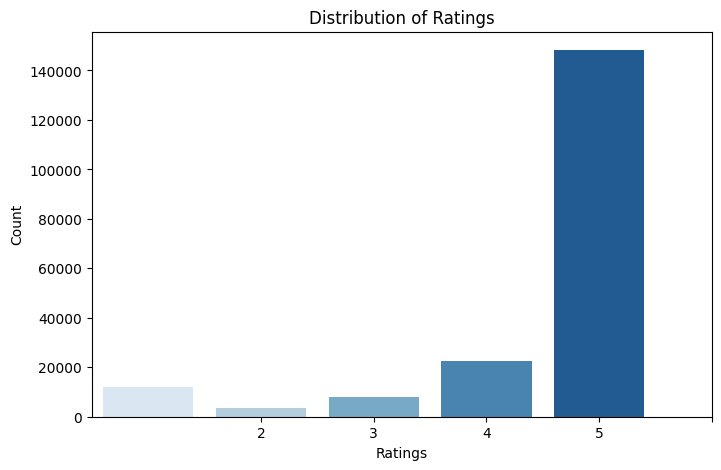

In [75]:
# --- Distribution of Ratings ---
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Ratings"], palette="Blues")
plt.title("Distribution of Ratings")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.xticks(range(1, 6))
plt.show()

> * The majority of the reviews are 5-star ratings, indicating a generally positive user experience.
> * There are significantly fewer 1-star and 2-star reviews, suggesting that extreme dissatisfaction is relatively rare.
> * **Insight**: The dataset is highly skewed towards positive reviews, which may impact sentiment analysis and introduce potential bias.

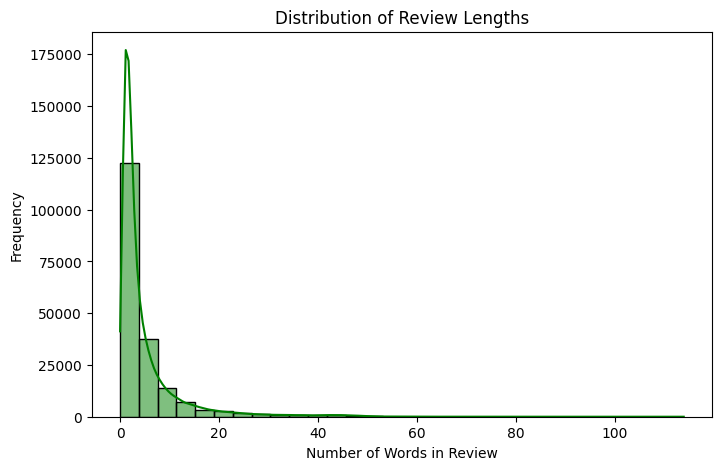

In [76]:
# --- Distribution of Review Lengths ---
plt.figure(figsize=(8, 5))
sns.histplot(df["Review Length"], bins=30, kde=True, color="green")
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Words in Review")
plt.ylabel("Frequency")
plt.show()

> * Most reviews are short, with a high frequency of very brief comments.
> * There is a long tail distribution, meaning some reviews contain significantly more words.
> * **Insight**: The majority of users provide concise feedback, which may limit the depth of textual analysis.

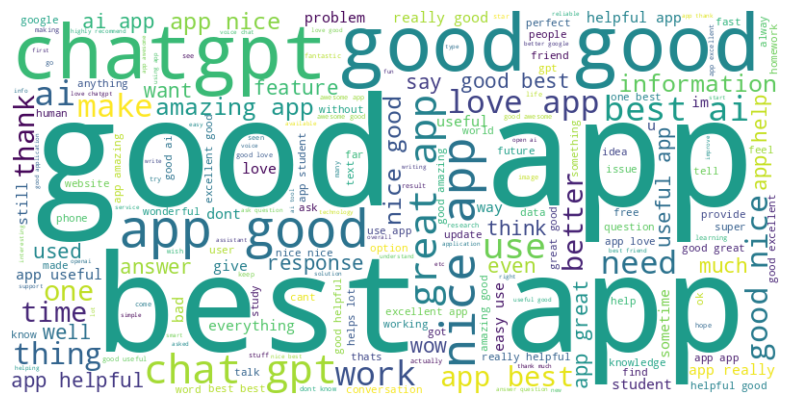

In [77]:
# --- Display a word cloud of the reviews ---
def generate_word_cloud(df):
    text = " ".join(review for review in df['Cleaned_Review'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

generate_word_cloud(df)

> * Common words include "good," "app," "best," "chatgpt," and "ai," indicating that users frequently mention the application's quality and AI capabilities.
> * **Insight**: Positive and neutral descriptors dominate, reflecting the high proportion of 5-star reviews.

In [46]:
# --- The most frequent words used in reviews for each rating category ---
def get_top_words(reviews, n=10):
    stop_words = set(stopwords.words('english'))
    words = " ".join(reviews).lower().translate(str.maketrans('', '', string.punctuation)).split()
    words = [word for word in words if word not in stop_words]
    return Counter(words).most_common(n)

for rating in sorted(df['Ratings'].unique(), reverse=True):
    top_words = get_top_words(df[df["Ratings"] == rating]["Cleaned_Review"], n=10)
    print(f"Top words for rating {rating}: {top_words}")

Top words for rating 5: [('app', 37348), ('good', 28572), ('best', 16221), ('nice', 10796), ('helpful', 9437), ('great', 9372), ('ai', 9025), ('love', 7636), ('amazing', 7523), ('chatgpt', 7378)]
Top words for rating 4: [('good', 6320), ('app', 5758), ('nice', 1833), ('great', 1714), ('like', 1584), ('helpful', 1458), ('ai', 1379), ('best', 1289), ('chatgpt', 1232), ('really', 1136)]
Top words for rating 3: [('good', 2205), ('app', 1892), ('like', 555), ('nice', 547), ('chatgpt', 477), ('chat', 431), ('use', 426), ('ai', 416), ('great', 413), ('please', 389)]
Top words for rating 2: [('app', 871), ('good', 581), ('cant', 303), ('like', 279), ('chatgpt', 274), ('chat', 224), ('please', 216), ('time', 202), ('use', 202), ('doesnt', 198)]
Top words for rating 1: [('app', 3420), ('cant', 1310), ('good', 1096), ('use', 883), ('even', 843), ('doesnt', 815), ('dont', 723), ('time', 703), ('ai', 695), ('error', 690)]


> * 5-star reviews contain words like "app," "good," "best," "helpful," and "love," highlighting appreciation.
> * 1-star and 2-star reviews frequently contain "can't," "bad," "doesn't," and "time," indicating common user frustrations.
> * **Insight**: The differentiation in word usage suggests distinct sentiment trends, which could help in classifying review sentiment.

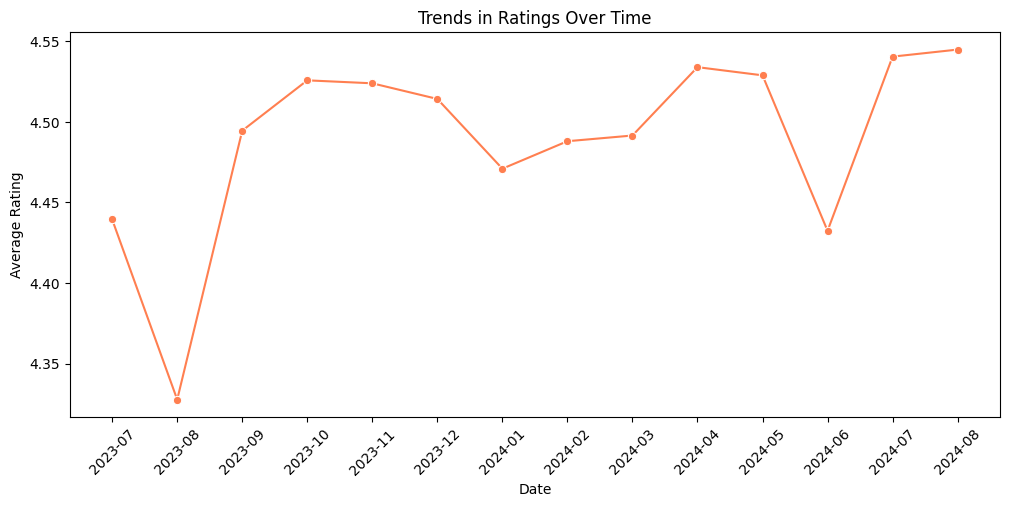

In [25]:
# --- Trends in Ratings Over Time ---
df_grouped = df.groupby(df["Review Date"].dt.to_period("M"))["Ratings"].mean().reset_index()
df_grouped["Review Date"] = df_grouped["Review Date"].astype(str)  # Convert period to string for plotting

plt.figure(figsize=(12, 5))
sns.lineplot(x="Review Date", y="Ratings", data=df_grouped, marker="o", color="coral")
plt.xticks(rotation=45)
plt.title("Trends in Ratings Over Time")
plt.xlabel("Date")
plt.ylabel("Average Rating")
plt.show()

> * The average rating fluctuates over time but remains relatively high, generally above 4.3 stars.
> * There are occasional dips in rating trends, which may correlate with specific product updates or external factors.
> * **Insight**: Monitoring these dips can help identify periods of user dissatisfaction and investigate potential causes.

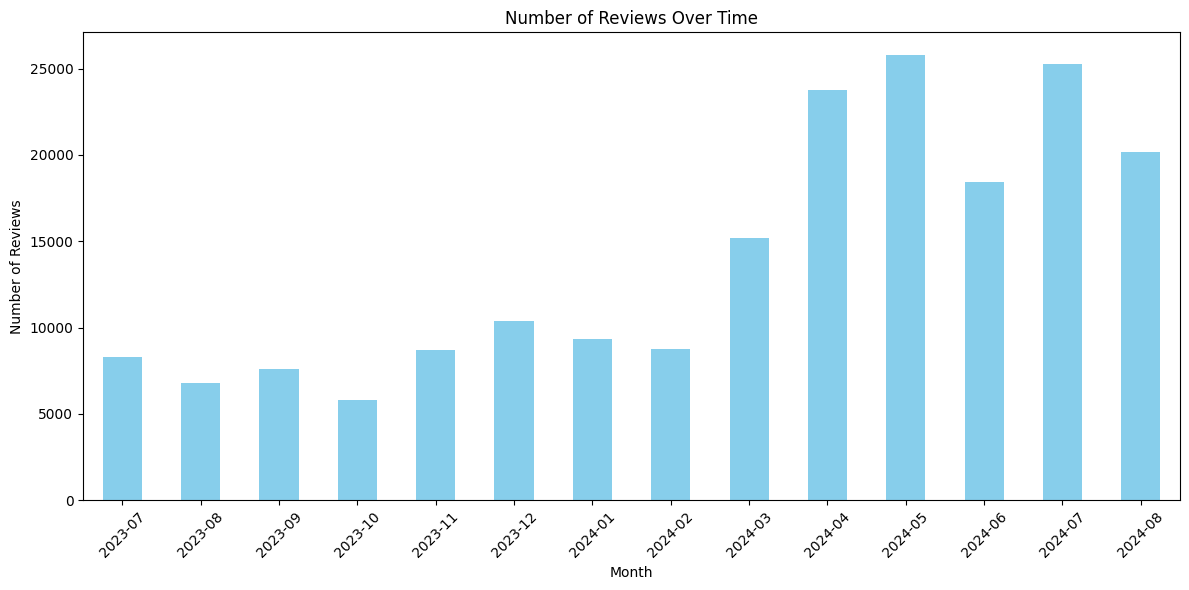

In [47]:
# --- Trends in Number of Reviews Over Time ---
review_counts = df.groupby(df['Review Date'].dt.to_period('M')).size()
review_counts.plot(kind='bar', color='skyblue', figsize=(12, 6))
plt.title("Number of Reviews Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> * There are spikes in review activity, indicating periods of high user engagement.
> * More recent months show an increase in review submissions.
> * **Insight**: Increased review frequency might align with marketing campaigns, feature updates, or wider adoption of the product.

In [89]:
# --- Transform ratings into sentiment categories ---
def categorize_rating(rating):
    if rating >= 4:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"

df["Sentiment"] = df["Ratings"].apply(categorize_rating)
df[['Ratings', 'Sentiment']]

,Ratings,Sentiment
0,5,Positive
1,5,Positive
2,5,Positive
3,5,Positive
4,5,Positive
...,...,...
196722,5,Positive
196723,5,Positive
196724,5,Positive
196725,5,Positive


<ipython-input-88-8aff8fcc0680>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Sentiment"], palette="Blues")


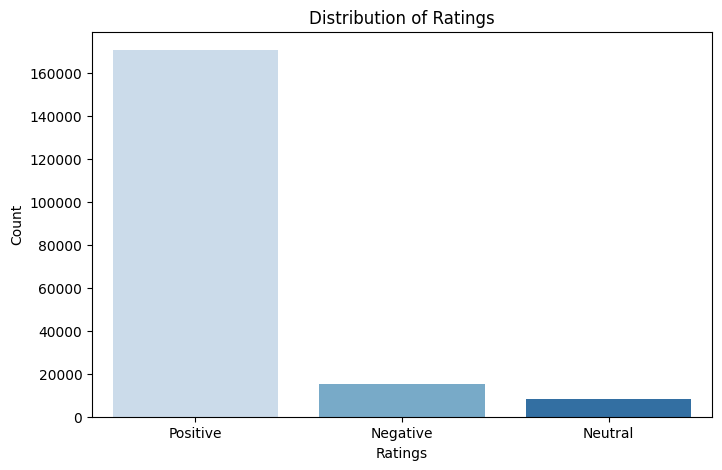

In [88]:
# --- Distribution of Sentiment ---
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Sentiment"], palette="Blues")
plt.title("Distribution of Ratings")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.xticks(range(0, 3))
plt.show()

> * Sentiment categories are strongly skewed towards Positive due to the dominance of high ratings.
> * Negative and Neutral reviews represent a small proportion of the dataset.
> * **Insight**: The imbalance in sentiment categories suggests a need for stratified analysis or weighting adjustments when training machine learning models.

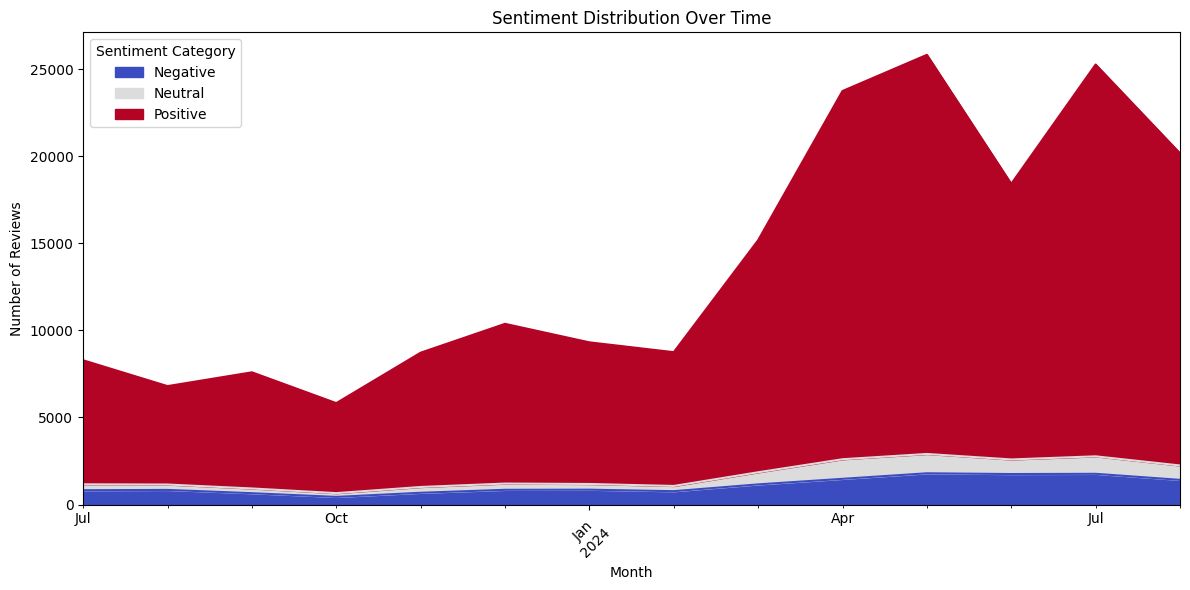

In [91]:
# --- Sentiment Distribution Over Time ---
sentiment_trend = df.groupby([df['Review Date'].dt.to_period('M'), 'Sentiment']).size().unstack(fill_value=0)
sentiment_trend.plot(kind='area', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title("Sentiment Distribution Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.legend(title="Sentiment Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> * Positive sentiment has been consistently dominant and increses in recent months.
> * There is a slight increase in Neutral and Negative reviews in certain months.
> * **Insight**: Fluctuations in sentiment may correspond to product changes, policy shifts, or external factors affecting user experience.

### 📌 EDA Summary

1. **Strong Positive Skew**: The dataset is dominated by 5-star ratings, leading to a high proportion of positive sentiment.

2. **Short Review Bias**: Most reviews are brief, making it harder to extract deep insights from text data.

3. **Distinct Word Patterns by Rating**: Positive reviews emphasize praise, while negative reviews highlight usability frustrations.

4. **Temporal Trends Matter**: Certain time periods show dips in ratings and increases in negative sentiment, requiring further investigation.

5. **Potential Bias in Sentiment Analysis**: Since most reviews are positive, sentiment analysis models may struggle to distinguish subtle differences between neutral and negative sentiment.